In [40]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os import path

In [46]:
def getResult(DIR):
    filename = [f for f in listdir(DIR) if f[-7:]=="ALL.out"][0]
    result = pickle.load(open(path.join(DIR, filename),"rb"))
    return result

In [47]:
def getStats(result):
    finalList = [tmp['final'] for tmp in result]
    return{
        "len": len(result),
        "gain": (len([tmp for tmp in result if tmp['final']>=0])/len(result)),
        "loss": (len([tmp for tmp in result if tmp['final']<0])/len(result)),
        "mean": np.mean(finalList),
        "max": np.max(finalList),
        "min": np.min(finalList),
        "25percentile": np.percentile(finalList, 25),
        "50percentile": np.percentile(finalList, 50),
        "75percentile": np.percentile(finalList, 75),
    }

In [53]:
PARENT = "./output/"
resultList = []
statsList = []
for folder in listdir(PARENT):
    try:
        result = getResult(path.join(PARENT, folder))
        resultList.append([tmp['final'] for tmp in result])
        statsList.append(getStats(result))
        print(folder)
    except Exception as e:
        print(e)

list index out of range
2
3
4
list index out of range


In [54]:
statsList

[{'len': 100,
  'gain': 0.7,
  'loss': 0.3,
  'mean': 661.5942468118229,
  'max': 5217.777963120767,
  'min': -4379.870967596704,
  '25percentile': -231.35597803976043,
  '50percentile': 635.9246600692268,
  '75percentile': 1849.0514939820441},
 {'len': 100,
  'gain': 0.74,
  'loss': 0.26,
  'mean': 206.11684129991932,
  'max': 3281.4560582777813,
  'min': -5907.931108891924,
  '25percentile': -15.149465297351526,
  '50percentile': 0.0,
  '75percentile': 689.948132866276},
 {'len': 100,
  'gain': 0.82,
  'loss': 0.18,
  'mean': 458.41445455395615,
  'max': 5045.152850941569,
  'min': -4455.337038365057,
  '25percentile': 0.0,
  '50percentile': 0.0,
  '75percentile': 937.9156172212693}]

In [55]:
resultList

[[2075.6158846854414,
  -171.66989101715808,
  -694.5250573360208,
  870.0298484813229,
  473.8287154951031,
  1374.581577418383,
  4341.035591721173,
  1503.1059218148766,
  2823.8053619237835,
  2326.747570223384,
  3031.121377750427,
  0.0,
  570.1884500920733,
  444.09868356195693,
  -2683.6081170081043,
  -301.68399799403414,
  1932.1080550394054,
  1429.556832918879,
  -666.546765232446,
  -1159.3055334138862,
  -671.1754430429428,
  -947.3321435497164,
  -532.6068314545882,
  4460.503027421457,
  2331.6849554174514,
  1302.3508071993201,
  625.0906212870068,
  2546.9107421462304,
  1922.430997457226,
  1907.7113311139983,
  -4379.870967596704,
  1966.3097919414795,
  -1420.8045519665557,
  217.06627360054517,
  1495.495840046995,
  -960.328674129476,
  1523.4465511702274,
  1109.3391945336516,
  646.7586988514468,
  2676.8637049083736,
  521.5949777074238,
  961.2661670858797,
  403.2490577405988,
  2643.4204637536495,
  2110.3074202058924,
  -1028.4455279785689,
  896.606351315

[Text(0, 0.5, 'Final Return($)'), Text(0.5, 0, 'Training Time')]

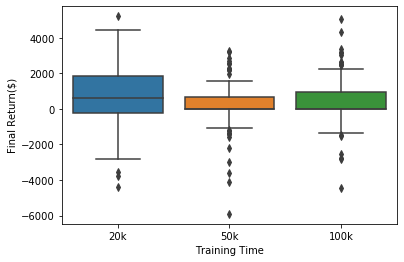

In [66]:
df = pd.DataFrame(resultList).transpose()
df.columns = ["20k", "50k", "100k"]
ax = sns.boxplot(data=df)
ax.set(xlabel='Training Time', ylabel='Final Return($)')

,20k,50k,100k
0,2075.615885,-1248.398855,245.521469
1,-171.669891,-2215.481184,-101.564494
2,-694.525057,0.000000,52.425577
3,870.029848,-127.824547,0.000000
4,473.828715,0.000000,2498.454278
...,...,...,...
95,586.734130,288.761938,0.000000
96,-1566.463416,-309.242769,0.000000
97,-1711.490926,-1430.729783,0.000000
98,370.868485,1078.673010,1977.533343
